In [5]:
import pandas as pd
import numpy as np

In [2]:
cities = np.array(["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"])
days = np.tile(np.arange(1, 31), len(cities))       # [1,2,...,30,1,2,...,30,...]
city_data = np.repeat(cities, 30)                   # ['Tehran','Tehran',...,'Ahvaz']
temperature = np.random.randint(15, 41, size=len(city_data))
humidity = np.random.randint(20, 81, size=len(city_data))
rainfall = np.random.randint(0, 51, size=len(city_data))
data = pd.DataFrame({
    "city": city_data,
    "day": days,
    "temperature": temperature,
    "humidity": humidity,
    "rainfall": rainfall
})

data


,city,day,temperature,humidity,rainfall
0,Tehran,1,18,66,17
1,Tehran,2,27,52,39
2,Tehran,3,25,33,29
3,Tehran,4,26,30,1
4,Tehran,5,18,41,31
...,...,...,...,...,...
175,Ahvaz,26,35,21,15
176,Ahvaz,27,15,65,45
177,Ahvaz,28,23,55,29
178,Ahvaz,29,22,70,36


In [3]:
mean_stats = data.groupby('city')[['temperature', 'humidity', 'rainfall']].mean()
hottest_city = mean_stats["temperature"].idxmax()
coldest_city = mean_stats["temperature"].idxmin()
rainy_days = data[data["rainfall"] > 10][['temperature']].count()
# rainy_days = data[data["rainfall"] > 10].groupby('city')[['temperature']].count().sort_values('temperature', ascending=False)

print('Mean stats of cities', mean_stats)
print('Hottest city', hottest_city)
print('Coldest citiy', coldest_city)
print('Rainy Days', rainy_days,)

Mean stats of cities          temperature   humidity   rainfall
city                                      
Ahvaz      29.000000  50.100000  25.933333
Isfahan    25.966667  50.633333  24.500000
Mashhad    25.900000  48.333333  20.333333
Shiraz     27.633333  52.666667  22.800000
Tabriz     28.133333  53.733333  24.933333
Tehran     25.633333  53.466667  23.333333
Hottest city Ahvaz
Coldest citiy Tehran
Rainy Days temperature    136
dtype: int64


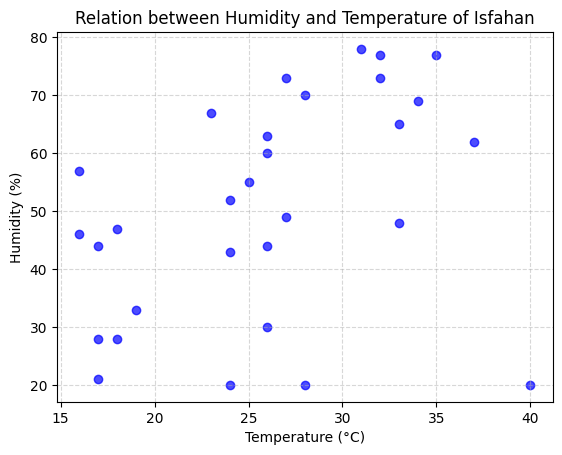

In [4]:
import matplotlib.pyplot as plt

isfahan_data = data[data['city'] == "Isfahan"]
# isfahan_temperatures = data[data['city'] == "Isfahan"]['temperature']
# print(isfahan_humidity)

# رسم نمودار پراکندگی (Scatter Plot)
plt.scatter(isfahan_data['temperature'], isfahan_data['humidity'], color='b', alpha=0.7)

plt.title('Relation between Humidity and Temperature of Isfahan')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### نقاط پراکنده هستند و هیچ ارتباطی به هم ندارند
#### طبیعتا به خاطر تصادفی بودن اطلاعات این موضوع طبیعی است